In [ ]:
!pip install tabulate
!pip install tensorflow_text
#!pip install tensorflow
import pandas as pd
import numpy as np 
from tabulate import tabulate
from sklearn import metrics
from wordcloud import WordCloud, STOPWORDS
import nltk
import re
import string
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')
import tensorflow_text

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:


from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')





In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')
# data=pd.read_csv("drive/My Drive/Depressed1.csv", encoding='mac-roman')
# #data=pd.read_csv("drive/My Drive/IPD_Reddit_Dataset.csv", encoding='mac-roman')


# data.head()

# print(data)
data=pd.read_csv('IPD_Reddit_Dataset.csv',encoding='mac_roman')
data.head()
print(data.shape)

(4738, 2)


In [ ]:
X = data.drop('is_depression', axis=1)
y=data['is_depression'].values
display(data.dtypes)

clean_text       object
is_depression     int64
dtype: object

In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('omw-1.4')
stopwords = nltk.corpus.stopwords.words('english')
lemmatizer = WordNetLemmatizer()


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
# To remove emails
email_regex = r'([a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+)'
regexes_to_remove = [email_regex, r'Subject:', r'Re:']

for i in range(0, len(X)):
    # removing all special charachter
    review = re.sub('[^a-zA-Z]', ' ', str(X['clean_text'][i]))
    # make document as lowerCase
    review = review.lower()
    # splitting the documents into words for ex ['iam', 'omar']
    review = review.split()
    # make limmatization --> (change, changing, changes)---> (change)
    review = [lemmatizer.lemmatize(word) for word in review if not word in set(stopwords)]
    # join the document agian
    review = ' '.join(review)
    
    # removing mails
    for r in regexes_to_remove:
        X['clean_text'][i] = re.sub(r, '', review)

In [ ]:
import pandas as pd

# Load the dataset from the CSV file
# data = pd.read_csv('your_dataset.csv')

# Separate the data into two classes based on the label column
class_0_data = data[data['is_depression'] == 0]
class_1_data = data[data['is_depression'] == 1]

# Randomly sample 800 rows from each class
class_0_sampled = class_0_data.sample(n=800, random_state=40,replace=True)
class_1_sampled = class_1_data.sample(n=800, random_state=40,replace=True)

# Concatenate the sampled data from both classes
sampled_data = pd.concat([class_0_sampled, class_1_sampled])

# Shuffle the rows of the sampled data
sampled_data = sampled_data.sample(frac=1, replace=True, random_state=40)
X = sampled_data.drop('is_depression', axis=1)
y=sampled_data ['is_depression']
# Now you can use the sampled_data for training your NLP model

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=40)

In [ ]:
print(X.shape)

(1600, 1)


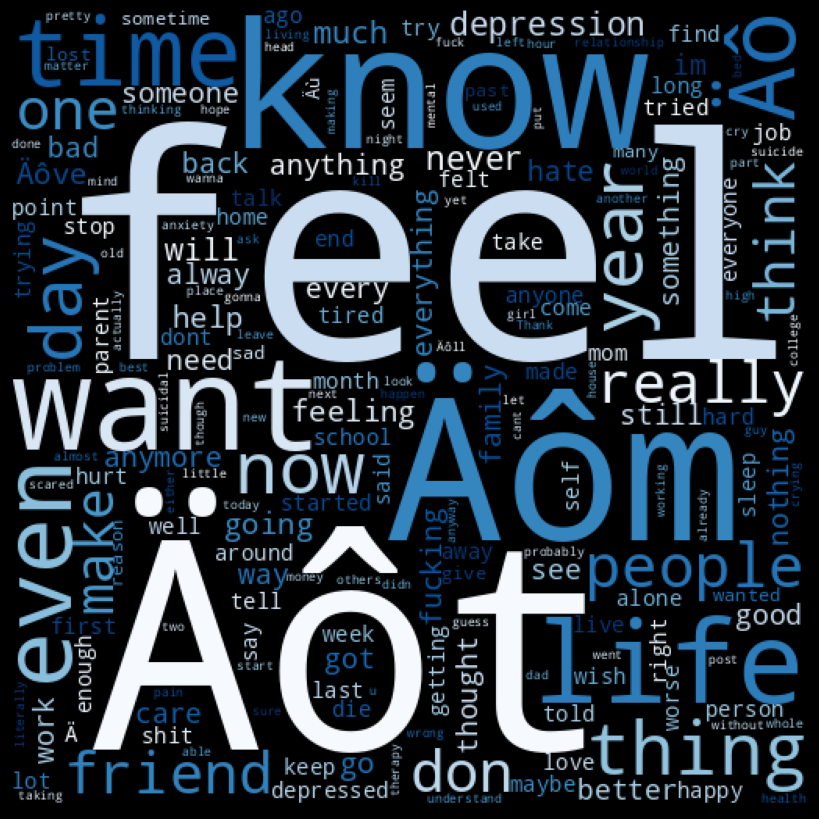

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
depressive_words = ' '.join(list(data[data['is_depression'] == 1] ['clean_text']))
depressive_wc = WordCloud(width = 512,height = 512, collocations=False, colormap="Blues").generate(depressive_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(depressive_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

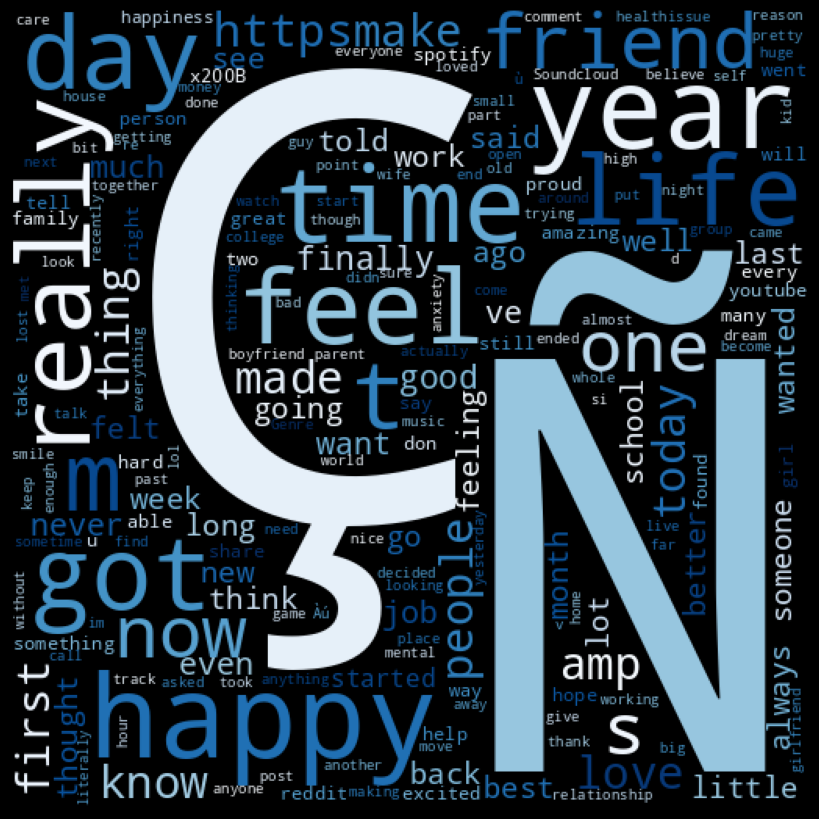

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
depressive_words = ' '.join(list(data[data['is_depression'] == 0]['clean_text']))
depressive_wc = WordCloud(width = 512,height = 512, collocations=False, colormap="Blues").generate(depressive_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(depressive_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

In [ ]:
# top words
from nltk.corpus import stopwords
stopwords_list = stopwords.words('english')
#let's extend the list to add "im" as we found it was not originally in the stopword list
stopwords_list.append("im")

word_counts = { 1: [],  #positive
                0: []}  #negative

pattern = re.compile('[^\w ]')
for clean_text, is_depression in zip(data['clean_text'], data['is_depression']):
    clean_text = re.sub(pattern, '', clean_text).lower().split()
    clean_text = [word for word in clean_text if word not in stopwords_list]
    word_counts[is_depression].extend(clean_text)

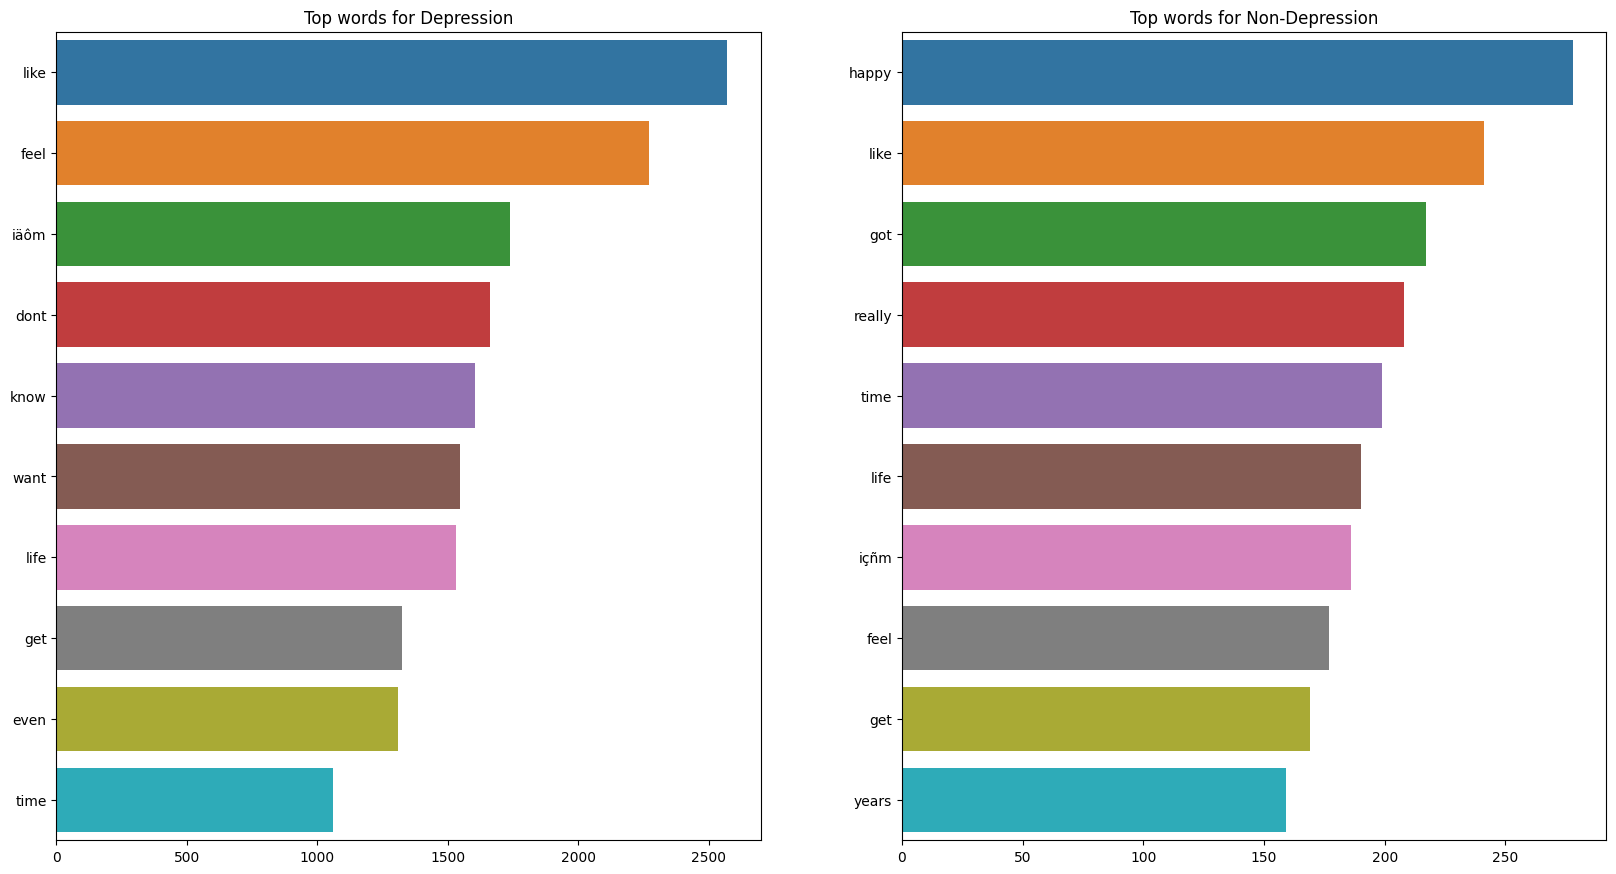

In [ ]:
import seaborn as sns
fig, axes = plt.subplots(1, 2, figsize=(20,10.5))
def changename(is_depression):
    if is_depression == 1:
        return ("Depression")
    else:
        return ("Non-Depression")
for axis, (target, words) in zip(axes.flatten(), word_counts.items()):
    bar_info = pd.Series(words).value_counts()[:10]
    sns.barplot(x=bar_info.values, y=bar_info.index, ax=axis)
    axis.set_title(f'Top words for {changename(target)}')
plt.show()
# sns.figure.savefig("output.png")

# **Feature Extraction**

# TF-IDF

In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1,1))
tfidf_vectorizer_n12 = TfidfVectorizer(max_features=10000, ngram_range=(2,2))


X_tfidf_train = tfidf_vectorizer.fit_transform(X_train['clean_text'])
X_tfidf_test = tfidf_vectorizer.transform(X_test['clean_text'])

X_tfidf_train_n12= tfidf_vectorizer_n12.fit_transform(X_train['clean_text'])
X_tfidf_test_n12=tfidf_vectorizer_n12.transform(X_test['clean_text'])

In [ ]:
print(X_tfidf_test)

  (0, 5265)	0.06024733869111196
  (0, 5229)	0.060813485484913395
  (0, 5177)	0.04702650729720304
  (0, 5155)	0.11457122364887813
  (0, 4872)	0.13801775669234073
  (0, 4866)	0.10490893648707746
  (0, 4837)	0.059520244722294474
  (0, 4818)	0.03668703803770689
  (0, 4783)	0.09208660563991886
  (0, 4696)	0.11457122364887813
  (0, 4600)	0.11457122364887813
  (0, 4543)	0.05570310033695932
  (0, 4507)	0.07028498694583252
  (0, 4473)	0.10490893648707746
  (0, 4418)	0.061006402913713065
  (0, 4388)	0.14543261292774864
  (0, 4369)	0.11457122364887813
  (0, 4352)	0.15140115295938833
  (0, 4075)	0.10056975909733218
  (0, 3859)	0.04993441198911186
  (0, 3498)	0.11457122364887813
  (0, 3353)	0.04764164366142645
  (0, 3345)	0.05882253645188125
  (0, 3332)	0.04660016637050496
  (0, 3311)	0.051651695112911955
  :	:
  (479, 4128)	0.48302871545775333
  (479, 4091)	0.1503003049110761
  (479, 3862)	0.11800062769531079
  (479, 3848)	0.1312092812944001
  (479, 3417)	0.1312092812944001
  (479, 3345)	0.0938334

In [ ]:
print(X_tfidf_train_n12)

  (0, 4871)	0.041955232008773866
  (0, 944)	0.041955232008773866
  (0, 9214)	0.041955232008773866
  (0, 6147)	0.041955232008773866
  (0, 8017)	0.041955232008773866
  (0, 1290)	0.030368423031383204
  (0, 8981)	0.026513076167342737
  (0, 4335)	0.040544368833105825
  (0, 1465)	0.036827987356809415
  (0, 5076)	0.025985881718355905
  (0, 4916)	0.029215663881069012
  (0, 7659)	0.041955232008773866
  (0, 645)	0.03939160968279164
  (0, 7360)	0.041955232008773866
  (0, 2369)	0.041955232008773866
  (0, 475)	0.041955232008773866
  (0, 1819)	0.041955232008773866
  (0, 1305)	0.041955232008773866
  (0, 2403)	0.041955232008773866
  (0, 3862)	0.041955232008773866
  (0, 3074)	0.041955232008773866
  (0, 4258)	0.041955232008773866
  (0, 2814)	0.03757269069574657
  (0, 9846)	0.041955232008773866
  (0, 6666)	0.041955232008773866
  :	:
  (1118, 3377)	0.07534491035958937
  (1118, 7019)	0.08397326464044351
  (1118, 2186)	0.09828664904189054
  (1118, 4027)	0.09664876178223013
  (1118, 8359)	0.09828664904189054

# Bag of Words

In [ ]:
vectorizer = CountVectorizer()
  
X_bow_train = vectorizer.fit_transform(X_train['clean_text'])
X_bow_test = vectorizer.transform(X_test['clean_text'])

# **Feature Selection**

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

# We Can select any model but linearSVC has l1 norm penality which deals with sparse
lsvc = LinearSVC(C=100, penalty='l1', max_iter=500, dual=False,random_state=40)
lsvc.fit(X_tfidf_train, y_train)

# This function select the best features that has high weigh
fs = SelectFromModel(lsvc, prefit=True)
# This function redeuce X to the selected features
X_selection = fs.transform(X_tfidf_train)
X_test_selection = fs.transform(X_tfidf_test)


lsvc.fit(X_tfidf_train_n12, y_train)
fs_n12 = SelectFromModel(lsvc, prefit=True)
X_selection_n12 = fs_n12.transform(X_tfidf_train_n12)
X_test_selection_n12 = fs_n12.transform(X_tfidf_test_n12)

lsvc.fit(X_bow_train, y_train)
fs_n12 = SelectFromModel(lsvc, prefit=True)
X_selection_bow = fs_n12.transform(X_bow_train)
X_test_selection_bow = fs_n12.transform(X_bow_test)

# **Linear SVC**

In [ ]:
lsvc = LinearSVC(C=1000, penalty='l1', max_iter=500, dual=False,random_state=40)
lsvc.fit(X_selection, y_train)
y_predict_tfidf = lsvc.predict(X_test_selection)

lsvc.fit(X_selection_n12,y_train)
y_predict_tfidf_n12 = lsvc.predict(X_test_selection_n12)

lsvc.fit(X_selection_bow,y_train)
y_predict_bow = lsvc.predict(X_test_selection_bow)


linear_svm_tfidf_results=metrics.precision_recall_fscore_support(y_test, y_predict_tfidf)
linear_svm_tfidf_n12_results=metrics.precision_recall_fscore_support(y_test, y_predict_tfidf_n12)
linear_svm_bow_results=metrics.precision_recall_fscore_support(y_test, y_predict_bow)


tfidf_acc= metrics.accuracy_score(y_test, y_predict_tfidf)
tfidf_n12_acc=accuracy_score(y_test, y_predict_tfidf_n12)
bow_acc= accuracy_score(y_test, y_predict_bow)



In [ ]:
data1 = [['TF-IDF','TF-IDF 2-grams ','bag of words'],
         ['precision',linear_svm_tfidf_results[0][0],linear_svm_tfidf_n12_results[0][0],linear_svm_bow_results[0][0]],
         ['recall',linear_svm_tfidf_results[1][0],linear_svm_tfidf_n12_results[1][0],linear_svm_bow_results[1][0]],
         ['F1-score',linear_svm_tfidf_results[2][0],linear_svm_tfidf_n12_results[2][0],linear_svm_bow_results[2][0]],
        ['accuracy',tfidf_acc,tfidf_n12_acc,bow_acc]]

print(tabulate(data1,headers='firstrow',tablefmt='fancy_grid'))

╒═══════════╤══════════╤═══════════════════╤════════════════╕
│           │   TF-IDF │   TF-IDF 2-grams  │   bag of words │
╞═══════════╪══════════╪═══════════════════╪════════════════╡
│ precision │ 0.937743 │          0.955357 │       0.95122  │
├───────────┼──────────┼───────────────────┼────────────────┤
│ recall    │ 0.926923 │          0.823077 │       0.9      │
├───────────┼──────────┼───────────────────┼────────────────┤
│ F1-score  │ 0.932302 │          0.884298 │       0.924901 │
├───────────┼──────────┼───────────────────┼────────────────┤
│ accuracy  │ 0.927083 │          0.883333 │       0.920833 │
╘═══════════╧══════════╧═══════════════════╧════════════════╛


# **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=10,random_state=40)
clf.fit(X_selection, y_train)
y_predict_tfidf_2 = clf.predict(X_test_selection)

clf.fit(X_selection_n12, y_train)
y_predict_tfidf_n12_2 = clf.predict(X_test_selection_n12)

clf.fit(X_selection_bow, y_train)
y_predict_bow_2 = clf.predict(X_test_selection_bow)

RandomForest_tfidf_results=metrics.precision_recall_fscore_support(y_test, y_predict_tfidf_2)
RandomForest_tfidf_n12_results=metrics.precision_recall_fscore_support(y_test, y_predict_tfidf_n12_2)
RandomForest_bow_results=metrics.precision_recall_fscore_support(y_test, y_predict_bow_2)

RandomForest_tfidf_acc= metrics.accuracy_score(y_test, y_predict_tfidf_2)
RandomForest_tfidf_n12_acc=accuracy_score(y_test, y_predict_tfidf_n12_2)
RandomForest_bow_acc= accuracy_score(y_test, y_predict_bow_2)



In [ ]:
data2 = [['TF-IDF','TF-IDF 2-grams ','bag of words'],
         ['precision',RandomForest_tfidf_results[0][0],RandomForest_tfidf_n12_results[0][0],RandomForest_bow_results[0][0]],
         ['recall',RandomForest_tfidf_results[1][0],RandomForest_tfidf_n12_results[1][0],RandomForest_bow_results[1][0]],
         ['F1-score',RandomForest_tfidf_results[2][0],RandomForest_tfidf_n12_results[2][0],RandomForest_bow_results[2][0]],
        ['accuracy',RandomForest_tfidf_acc,RandomForest_tfidf_n12_acc, RandomForest_bow_acc]]

print(tabulate(data2,headers='firstrow',tablefmt='fancy_grid'))

╒═══════════╤══════════╤═══════════════════╤════════════════╕
│           │   TF-IDF │   TF-IDF 2-grams  │   bag of words │
╞═══════════╪══════════╪═══════════════════╪════════════════╡
│ precision │ 0.918367 │          0.924051 │       0.919831 │
├───────────┼──────────┼───────────────────┼────────────────┤
│ recall    │ 0.865385 │          0.561538 │       0.838462 │
├───────────┼──────────┼───────────────────┼────────────────┤
│ F1-score  │ 0.891089 │          0.698565 │       0.877264 │
├───────────┼──────────┼───────────────────┼────────────────┤
│ accuracy  │ 0.885417 │          0.7375   │       0.872917 │
╘═══════════╧══════════╧═══════════════════╧════════════════╛


# **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=40)
lr.fit(X_selection, y_train)
y_predict_tfidf = lr.predict(X_test_selection)

lr.fit(X_selection_n12,y_train)
y_predict_tfidf_n12 = lr.predict(X_test_selection_n12)

lr.fit(X_selection_bow,y_train)
y_predict_bow = lr.predict(X_test_selection_bow)


lr_tfidf_results=metrics.precision_recall_fscore_support(y_test, y_predict_tfidf)
lr_tfidf_n12_results=metrics.precision_recall_fscore_support(y_test, y_predict_tfidf_n12)
lr_bow_results=metrics.precision_recall_fscore_support(y_test, y_predict_bow)

tfidf_acc= metrics.accuracy_score(y_test, y_predict_tfidf)
tfidf_n12_acc=accuracy_score(y_test, y_predict_tfidf_n12)
bow_acc= accuracy_score(y_test, y_predict_bow)


In [ ]:
data3 = [['TF-IDF','TF-IDF 2-grams ','bag of words'],
         ['precision',lr_tfidf_results[0][0],lr_tfidf_n12_results[0][0],lr_bow_results[0][0]],
         ['recall',lr_tfidf_results[1][0],lr_tfidf_n12_results[1][0],lr_bow_results[1][0]],
         ['F1-score',lr_tfidf_results[2][0],lr_tfidf_n12_results[2][0],lr_bow_results[2][0]],
        ['accuracy',tfidf_acc,tfidf_n12_acc,bow_acc]]

print(tabulate(data3,headers='firstrow',tablefmt='fancy_grid'))

╒═══════════╤══════════╤═══════════════════╤════════════════╕
│           │   TF-IDF │   TF-IDF 2-grams  │   bag of words │
╞═══════════╪══════════╪═══════════════════╪════════════════╡
│ precision │ 0.901887 │          0.943966 │       0.936759 │
├───────────┼──────────┼───────────────────┼────────────────┤
│ recall    │ 0.919231 │          0.842308 │       0.911538 │
├───────────┼──────────┼───────────────────┼────────────────┤
│ F1-score  │ 0.910476 │          0.890244 │       0.923977 │
├───────────┼──────────┼───────────────────┼────────────────┤
│ accuracy  │ 0.902083 │          0.8875   │       0.91875  │
╘═══════════╧══════════╧═══════════════════╧════════════════╛


# **KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=5)

KNN.fit(X_selection, y_train)
y_predict_tfidf = KNN.predict(X_test_selection)

KNN.fit(X_selection_n12,y_train)
y_predict_tfidf_n12 = KNN.predict(X_test_selection_n12)

KNN.fit(X_selection_bow,y_train)
y_predict_bow = KNN.predict(X_test_selection_bow)


KNN_tfidf_results=metrics.precision_recall_fscore_support(y_test, y_predict_tfidf)
KNN_tfidf_n12_results=metrics.precision_recall_fscore_support(y_test, y_predict_tfidf_n12)
KNN_bow_results=metrics.precision_recall_fscore_support(y_test, y_predict_bow)

tfidf_acc= metrics.accuracy_score(y_test, y_predict_tfidf)
tfidf_n12_acc=accuracy_score(y_test, y_predict_tfidf_n12)
bow_acc= accuracy_score(y_test, y_predict_bow)



data4 = [['TF-IDF','TF-IDF 2-grams ','bag of words'],
         ['precision',KNN_tfidf_results[0][0],KNN_tfidf_n12_results[0][0],KNN_bow_results[0][0]],
         ['recall',KNN_tfidf_results[1][0],KNN_tfidf_n12_results[1][0],KNN_bow_results[1][0]],
         ['F1-score',KNN_tfidf_results[2][0],KNN_tfidf_n12_results[2][0],KNN_bow_results[2][0]],
        ['accuracy',tfidf_acc,tfidf_n12_acc,bow_acc]]

print(tabulate(data4,headers='firstrow',tablefmt='fancy_grid'))

╒═══════════╤══════════╤═══════════════════╤════════════════╕
│           │   TF-IDF │   TF-IDF 2-grams  │   bag of words │
╞═══════════╪══════════╪═══════════════════╪════════════════╡
│ precision │ 0.867704 │          0.950355 │       0.821839 │
├───────────┼──────────┼───────────────────┼────────────────┤
│ recall    │ 0.857692 │          0.515385 │       0.55     │
├───────────┼──────────┼───────────────────┼────────────────┤
│ F1-score  │ 0.862669 │          0.668329 │       0.658986 │
├───────────┼──────────┼───────────────────┼────────────────┤
│ accuracy  │ 0.852083 │          0.722917 │       0.691667 │
╘═══════════╧══════════╧═══════════════════╧════════════════╛


### LSTM

In [ ]:
!pip install keras_preprocessing
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, Dropout
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical
from tensorflow.keras.utils import to_categorical, plot_model
from keras.metrics import Precision, Recall
import re

from keras.preprocessing.text import Tokenizer
from keras import regularizers
from keras import layers
from keras import regularizers
from keras import backend as K
from keras.callbacks import ModelCheckpoint

import keras.backend as K

def f1_score(precision, recall):
    ''' Function to calculate f1 score '''
    
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
max_words = 5000
max_len = 200

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X['clean_text'])
sequences = tokenizer.texts_to_sequences(X['clean_text'])
reddit = pad_sequences(sequences, maxlen=max_len)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(reddit, y, test_size=0.3, random_state=40)

In [ ]:
model2 = Sequential()
model2.add(layers.Embedding(max_words, 128))
model2.add(layers.LSTM(64,dropout=0.5))
model2.add(layers.Dense(16, activation='relu'))
model2.add(layers.Dense(8, activation='relu'))
model2.add(layers.Dense(1,activation='sigmoid'))
model2.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy', Precision(), Recall()])
checkpoint2 = ModelCheckpoint("rnn_model.hdf5", monitor='val_accuracy', verbose=1,save_best_only=True, mode='auto', period=1,save_weights_only=False)
history = model2.fit(X_train, y_train, epochs=10,validation_data=(X_test, y_test),callbacks=[checkpoint2])

Epoch 1/10
35/35 [==============================] - ETA: 0s - loss: 0.6593 - accuracy: 0.5839 - precision_2: 0.5568 - recall_2: 0.9216
Epoch 1: val_accuracy improved from -inf to 0.71042, saving model to rnn_model.hdf5
35/35 [==============================] - 17s 412ms/step - loss: 0.6593 - accuracy: 0.5839 - precision_2: 0.5568 - recall_2: 0.9216 - val_loss: 0.6177 - val_accuracy: 0.7104 - val_precision_2: 0.6224 - val_recall_2: 0.9364
Epoch 2/10
35/35 [==============================] - ETA: 0s - loss: 0.5060 - accuracy: 0.8134 - precision_2: 0.7463 - recall_2: 0.9634
Epoch 2: val_accuracy improved from 0.71042 to 0.84583, saving model to rnn_model.hdf5
35/35 [==============================] - 13s 387ms/step - loss: 0.5060 - accuracy: 0.8134 - precision_2: 0.7463 - recall_2: 0.9634 - val_loss: 0.4865 - val_accuracy: 0.8458 - val_precision_2: 0.7944 - val_recall_2: 0.8955
Epoch 3/10
35/35 [==============================] - ETA: 0s - loss: 0.2746 - accuracy: 0.9348 - precision_2: 0.9402

In [ ]:
# Evaluate model on the test set
loss, accuracy, precision, recall = model2.evaluate(X_test, y_test, verbose=0)
# Print metrics
print('')
print('Accuracy  : {:.4f}'.format(accuracy))
print('Precision : {:.4f}'.format(precision))
print('Recall    : {:.4f}'.format(recall))
print('F1 Score  : {:.4f}'.format(f1_score(precision, recall)))


Accuracy  : 0.9062
Precision : 0.9070
Recall    : 0.8864
F1 Score  : 0.8966


# **BERT**

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

In [ ]:

bert_pre = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_enc = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")
#bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
#bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-24_H-1024_A-16/4")

In [ ]:
initializer = tf.keras.initializers.GlorotUniform()
initializer2 = tf.keras.initializers.HeNormal()

In [ ]:
#creacion del modelo

# Bert layers
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = bert_pre(text_input)
outputs = bert_enc(preprocessed_text)

# Neural network layers
l = tf.keras.layers.Dropout(0.2, name="dropout")(outputs['sequence_output'])
l = tf.keras.layers.Bidirectional(tf.keras.layers.GRU(60))(l)
l = tf.keras.layers.Dense(5, activation = 'tanh')(l)
l = tf.keras.layers.Dense(1, activation='sigmoid', name="output")(l)

# Use inputs and outputs to construct a final model
model = tf.keras.Model(inputs=[text_input], outputs = [l])

In [ ]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 keras_layer_4 (KerasLayer)     {'input_word_ids':   0           ['text[0][0]']                   
                                (None, 128),                                                      
                                 'input_mask': (Non                                               
                                e, 128),                                                          
                                 'input_type_ids':                                                
                                (None, 128)}                                                

In [ ]:
import time
     
model_path = 'depression_Classifier.h5'



METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall')
]

#opt = tf.keras.optimizers.RMSprop(learning_rate=0.01,momentum=0.4, clipvalue=1.0)
opt = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(optimizer=opt,
              loss='binary_crossentropy',
              metrics=METRICS)

#creacion de callbacks
callback_earlyStopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=7)

model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    model_path, # ruta de guardado para el checkpoint
    save_best_only=True
)

In [ ]:
p = X['clean_text']
q = y


X_train, X_test, y_train, y_test = train_test_split(p, q, test_size=0.3, random_state=40)

In [ ]:
start = time.time() 
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), callbacks = [model_checkpoint,callback_earlyStopping])
end = time.time()
print(end-start)

Epoch 1/10
35/35 [==============================] - 49s 663ms/step - loss: 0.4457 - accuracy: 0.8268 - precision: 0.8146 - recall: 0.8571 - val_loss: 0.3134 - val_accuracy: 0.8958 - val_precision: 0.8373 - val_recall: 0.9591
Epoch 2/10
35/35 [==============================] - 19s 537ms/step - loss: 0.2531 - accuracy: 0.9438 - precision: 0.9506 - recall: 0.9390 - val_loss: 0.2585 - val_accuracy: 0.9333 - val_precision: 0.8884 - val_recall: 0.9773
Epoch 3/10
35/35 [==============================] - 24s 698ms/step - loss: 0.1892 - accuracy: 0.9705 - precision: 0.9737 - recall: 0.9686 - val_loss: 0.2187 - val_accuracy: 0.9417 - val_precision: 0.9364 - val_recall: 0.9364
Epoch 4/10
35/35 [==============================] - 21s 592ms/step - loss: 0.1540 - accuracy: 0.9804 - precision: 0.9825 - recall: 0.9791 - val_loss: 0.2127 - val_accuracy: 0.9458 - val_precision: 0.9254 - val_recall: 0.9591
Epoch 5/10
35/35 [==============================] - 19s 542ms/step - loss: 0.1367 - accuracy: 0.9821

In [ ]:
modelPath = 'depression_Classifier.h5'

model = tf.keras.models.load_model(
       (modelPath),
       custom_objects={'KerasLayer':hub.KerasLayer}
)

In [ ]:
#model.evaluate(X_test, y_test)

# Evaluate model on the test set
loss, accuracy, precision, recall = model.evaluate(X_test, y_test, verbose=0)
# Print metrics
print('')
print('Accuracy  : {:.4f}'.format(accuracy))
print('Precision : {:.4f}'.format(precision))
print('Recall    : {:.4f}'.format(recall))
print('F1 Score  : {:.4f}'.format(f1_score(precision, recall)))


Accuracy  : 0.9604
Precision : 0.9427
Recall    : 0.9727
F1 Score  : 0.9575


In [ ]:
y_predicted = model.predict(X_test)
y_predicted = y_predicted.flatten()

y_predictedFinal = np.where(y_predicted > 0.2, 1, 0)

15/15 [==============================] - 6s 331ms/step


Text(50.722222222222214, 0.5, 'Truth')

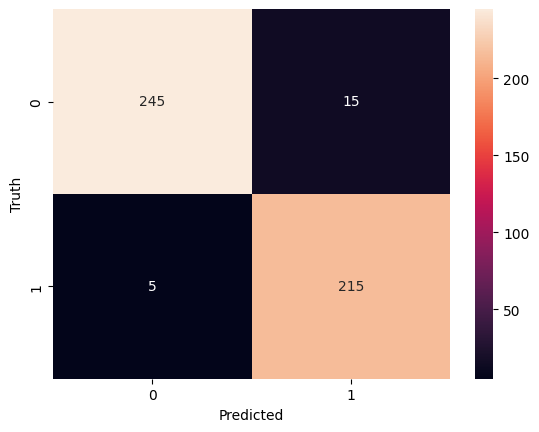

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_predictedFinal)
from matplotlib import pyplot as plt
import seaborn as sn
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
print(classification_report(y_test, y_predictedFinal))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96       260
           1       0.93      0.98      0.96       220

    accuracy                           0.96       480
   macro avg       0.96      0.96      0.96       480
weighted avg       0.96      0.96      0.96       480

